In [196]:
import numpy as np
import random
import gudhi as gd
from matplotlib import pyplot as plt
from scipy.sparse import diags
import sys
sys.path.append('code')
import dmtsignal as dmt
import dmtvisual as dmtvis
import matplotlib as mpl
import importlib
dmt = importlib.reload(dmt)
dmtvis = importlib.reload(dmtvis)

### Toy example 1.1: unweighted cell complex

4 points


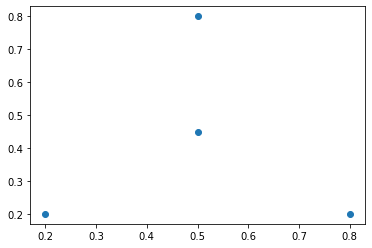

In [174]:
points=np.array([[0.2,0.2],[0.8,0.2],[0.5,0.45],[0.5,0.8]])
n_points = points.shape[0]
print(f'{n_points} points')
plt.scatter(*points.T);

In [175]:
## Build graph and associated boundaries
st=gd.SimplexTree()
st.insert([0,2])
st.insert([1,2])
st.insert([2,3])
st.insert([1,3])
X=dmt.extract_simplices(st)
kX=dmt.build_boundaries(X)

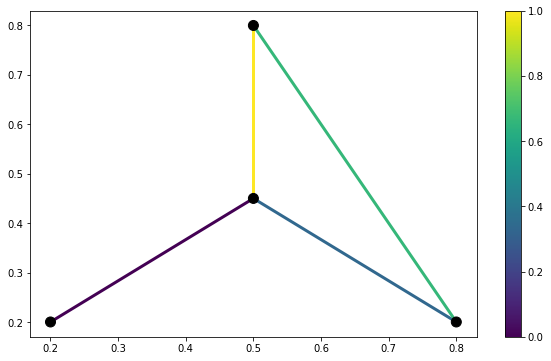

In [176]:
## Assign signal to the edges
s0 = ['black']*len(X[0])
#s1 = np.random.uniform(size=len(X[1]))
s1=np.arange(len(X[0]))+1
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
dmtvis.plot_nodes(s0, points,ax, zorder=3,s=100)
dmtvis.plot_edges(s1.copy(),points,X, ax, zorder=2,linewidths=3)
plt.colorbar(ax.collections[0], ax=ax)
plt.show()

We collapse the pair: [[[2], [0, 2]]]
The original signal on the edges is [1 2 3 4]
Reconstructed signal: [0. 1. 3. 5.]
Difference between original signal and reconstructed signal: [ 1.  1.  0. -1.]


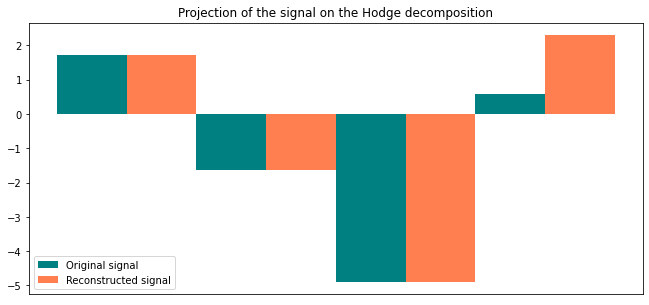

In [177]:
c=[[[2],[0,2]]]
print("We collapse the pair:", c)
print("The original signal on the edges is", s1)
reconstructed_sig=dmt.phipsi(X=X,kX=kX,collapses=c,dim_collapses=[0],signal=s1,type_collapse='down')
print("Reconstructed signal:", reconstructed_sig)
print("Difference between original signal and reconstructed signal:", s1-reconstructed_sig)

dmtvis.plot_hodge_decomp(X=X,kX=kX,s1=s1,phispsis=reconstructed_sig,trange=None,type_collapse='down')

In [178]:
## Loss for a given collapse
loss=dmt.loss_signal(X=X,kX=kX,collapses=c,dim_collapses=[0],signal=s1,type_collapse='down')
print("The signal loss is ",loss)

The signal loss is  2.9999999999999996


In [179]:
all_X,all_collapses,all_losses,total_loss,all_signals,phispsis=dmt.sequence_optimal_down_collapses(X=X,kX=kX,dimq=0,signal=s1,steps=2)
print("Two optimal collapses are:", all_collapses)
print("The signal on the collapsed complex is:", all_signals[-1])
print("Reconstructed signal:", phispsis)
print("Difference between original signal and reconstructed signal:", s1-phispsis)

print("The total loss is:",total_loss)

Two optimal collapses are: [[[0], [0, 2]], [[2], [1, 2]]]
The signal on the collapsed complex is: [3. 6.]
Reconstructed signal: [0. 0. 3. 6.]
Difference between original signal and reconstructed signal: [ 1.  2.  0. -2.]
The total loss is: [1.0, 3.0]


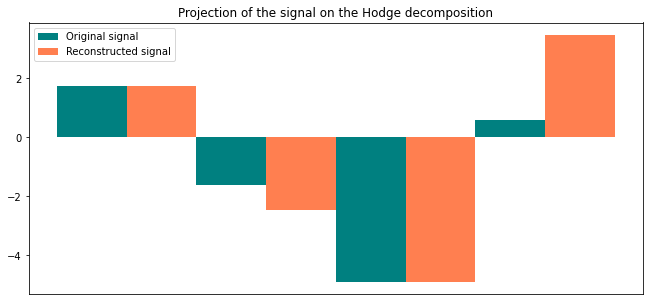

In [180]:
dmtvis.plot_hodge_decomp(X=X,kX=kX,s1=s1,phispsis=phispsis,trange=None,type_collapse='down')

### Toy example 1.2: weighted cell complex

We will consider the same cell complex as above but with weights on the edges.

In [181]:
w0=diags(np.ones(len(X[0])))
w1=diags(np.arange(len(X[0]))+1)
weights=[w0,w1]
print("The weighst on the nodes are:", w0.data)
print("The weighst on the edges are:" ,w1.data)


The weighst on the nodes are: [[1. 1. 1. 1.]]
The weighst on the edges are: [[1. 2. 3. 4.]]


In [182]:
## Build boundaries
kXw=dmt.build_boundaries(X,weights)
print("The weighted 1-boundary is \n", kXw[0].toarray())

The weighted 1-boundary is 
 [[-1.          0.          0.          0.        ]
 [ 0.         -0.5        -0.33333333  0.        ]
 [ 1.          0.5         0.         -0.25      ]
 [ 0.          0.          0.33333333  0.25      ]]


We collapse the pair: [[[2], [0, 2]]]
The original signal on the edges is [1 2 3 4]
Reconstructed signal: [0.   1.5  3.   4.25]
Difference between original signal and reconstructed signal: [ 1.    0.5   0.   -0.25]


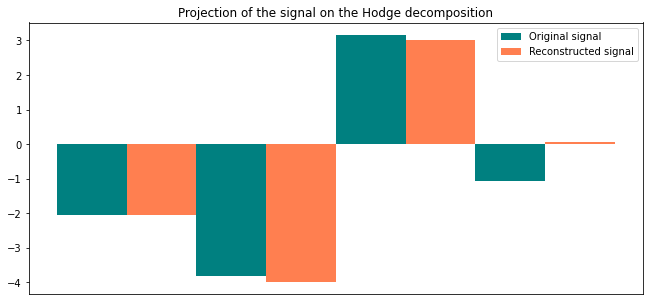

In [183]:
c=[[[2],[0,2]]]
print("We collapse the pair:", c)
print("The original signal on the edges is", s1)
reconstructed_sig=dmt.phipsi(X=X,kX=kXw,collapses=c,dim_collapses=[0],signal=s1,type_collapse='down')
print("Reconstructed signal:", reconstructed_sig)
print("Difference between original signal and reconstructed signal:", s1-reconstructed_sig)

dmtvis.plot_hodge_decomp(X=X,kX=kXw,s1=s1,phispsis=reconstructed_sig,trange=None,type_collapse='down')

In [184]:
## Loss for a given collapse
loss=dmt.loss_signal(X=X,kX=kXw,collapses=c,dim_collapses=[0],signal=s1,type_collapse='down')
print("The signal loss is ",loss)

The signal loss is  1.3125


In [185]:
all_X,all_collapses,all_losses,total_loss,all_signals,phispsis=dmt.sequence_optimal_down_collapses(X=X,kX=kXw,dimq=0,signal=s1,steps=2)
print("Two optimal collapses are:", all_collapses)
print("The signal on the collapsed complex is:", all_signals[-1])
print("Reconstructed signal:", phispsis)
print("Difference between original signal and reconstructed signal:", s1-phispsis)
print("The total loss is:",total_loss)

Two optimal collapses are: [[[0], [0, 2]], [[2], [1, 2]]]
The signal on the collapsed complex is: [3. 5.]
Reconstructed signal: [0. 0. 3. 5.]
Difference between original signal and reconstructed signal: [ 1.  2.  0. -1.]
The total loss is: [1.0, 2.449489742783178]


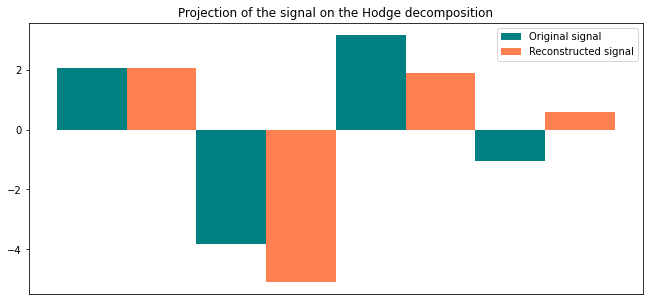

In [186]:
dmtvis.plot_hodge_decomp(X=X,kX=kXw,s1=s1,phispsis=phispsis,trange=None,type_collapse='down')

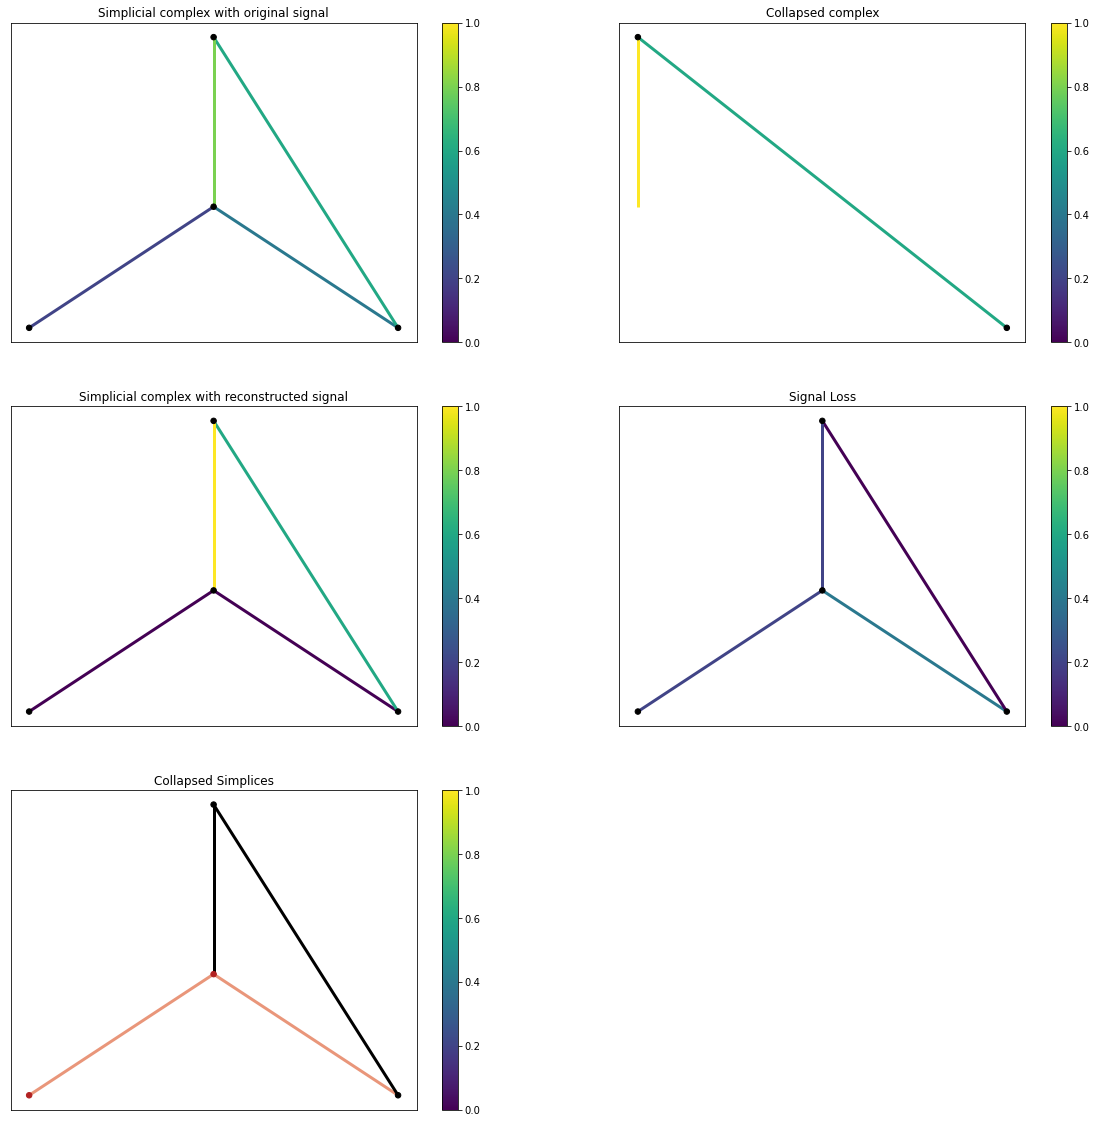

In [187]:
colX=all_X[-1]
colS=all_signals[-1]
collapses=all_collapses
dmtvis.plot_sequence_edgecollapses(X=X,dimq=0,signal=s1,collapsed_X=colX,collapsed_signal=colS,phipsis=phispsis,collapses=collapses,points=points,color_tri='lavenderblush',size_nodes=30,size_lines=3,type_collapse="down")

### Toy example 2: collapsing a wighted graph

10 points


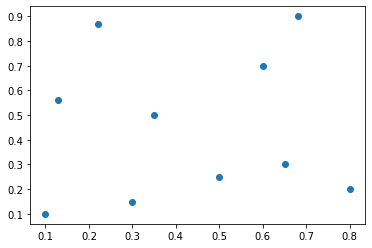

In [188]:
points=np.array([[0.1,0.1],[0.3,0.15],[0.5,0.25],[0.8,0.2],[0.35,0.5],[0.6,0.7],[0.13,0.56],[0.22,0.87],[0.68,0.9],[0.65,0.3]])
n_points = points.shape[0]
print(f'{n_points} points')
plt.scatter(*points.T);

In [189]:
edges=[[0,4],[1,4],[4,6],[2,4],[4,7],[4,5],[2,5],[5,7],[5,8],[5,9],[2,9],[3,9]]
triangles=[[4,5,7],[2,9,5]]
st=gd.SimplexTree()
for e in edges:
    st.insert(e)
for t in triangles:
    st.insert(t)
X=dmt.extract_simplices(st)

In [190]:
w0=diags(np.ones(len(X[0])))
w1=diags(np.ones(len(X[1])))
w2=diags(np.ones(len(X[2])))
weights=[w0,w1,w2]
print("The weighst on the nodes are:", w0.data)
print("The weighst on the edges are:" ,w1.data)

kXw=dmt.build_boundaries(X,weights)

The weighst on the nodes are: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
The weighst on the edges are: [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


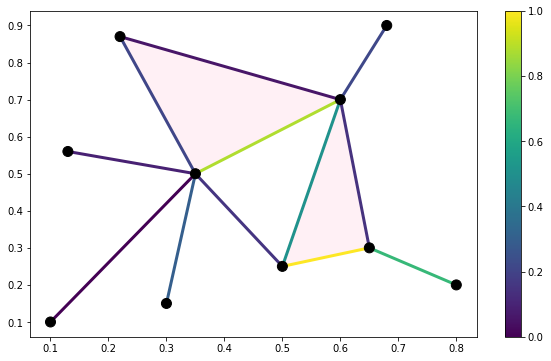

In [191]:
## Assign signal to the edges
s0 = ['black']*len(X[0])
s1 = np.random.uniform(size=len(X[1]))
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
dmtvis.plot_nodes(s0, points,ax, zorder=3,s=100)
dmtvis.plot_edges(s1.copy(),points,X, ax, zorder=2,linewidths=3)
dmtvis.plot_triangles_plain('lavenderblush',points,X, ax,zorder=1)
plt.colorbar(ax.collections[0], ax=ax)
plt.show()

In [192]:
all_X,all_collapses,all_losses,total_loss,all_signals,phispsis=dmt.sequence_optimal_down_collapses(X=X,kX=kXw,dimq=0,signal=s1,steps=4)


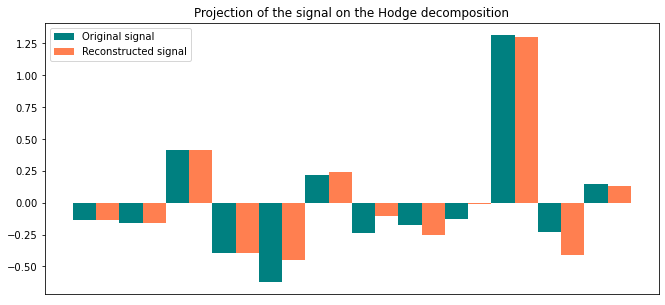

In [193]:
dmtvis.plot_hodge_decomp(X=X,kX=kXw,s1=s1,phispsis=phispsis,trange=None,type_collapse='down')

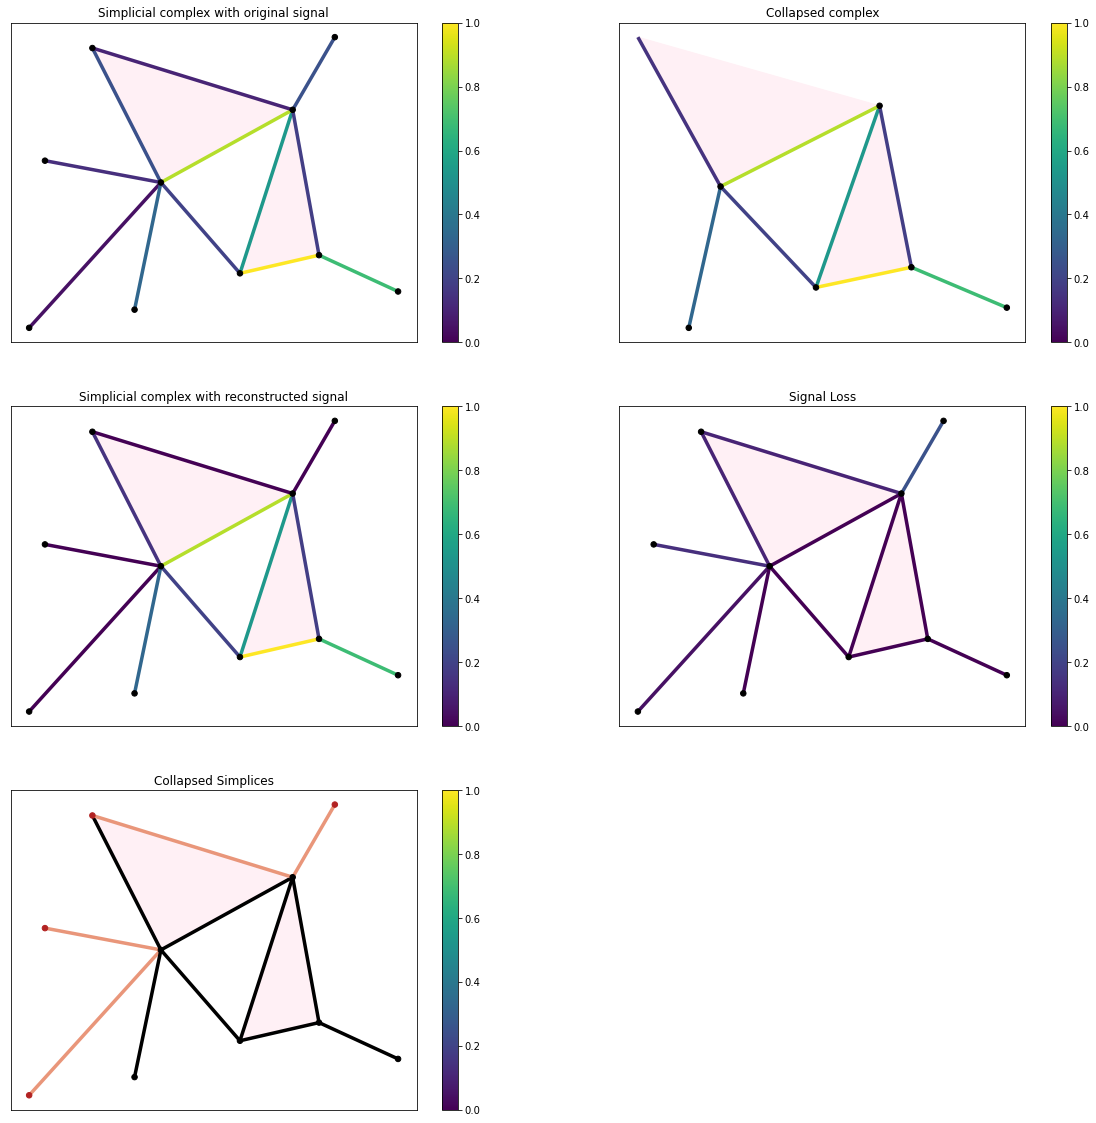

In [197]:
colX=all_X[-1]
colS=all_signals[-1]
collapses=all_collapses
dmtvis.plot_sequence_edgecollapses(X=X,dimq=0,signal=s1,collapsed_X=colX,collapsed_signal=colS,phipsis=phispsis,collapses=collapses,points=points,color_tri='lavenderblush',size_nodes=30,size_lines=3.5,type_collapse="down")

### Example 3: Graphs

In [200]:
a=np.arange(1,100)

In [201]:
np.histogram(a,np.arange(1,20))

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]))